In [1]:
from datetime import *
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
df_apartment = pd.read_csv(' apartment.csv')
df_receipt1 = pd.read_csv('receipt1.csv')
df_receipt2 = pd.read_csv('receipt2.csv')

In [3]:
tariff = {
    'cold_water_pr' : [15],
    'gigacalorie_pr' : [22],
}
df_tariff = pd.DataFrame(tariff)

In [4]:
df_all_receipts = pd.concat([df_receipt1,df_receipt2], ignore_index=True)

In [5]:
df_merged = df_all_receipts.merge(df_apartment, how='right')

In [6]:
df_merged['cold_water_pr'] = df_tariff.loc[0, 'cold_water_pr']
df_merged['gigacalorie_pr'] = df_tariff.loc[0, 'gigacalorie_pr']

In [7]:
df_merged

,ap_id,month_name,cold_w_amount,hot_w_amount,house_num,ap_num,cold_water_pr,gigacalorie_pr
0,1,January,10,NaN,23,2,15,22
1,1,December,11,NaN,23,2,15,22
2,1,January,14,5.0,23,2,15,22
3,2,September,23,NaN,58,4,15,22
4,2,June,5,8.0,58,4,15,22
5,2,December,16,1.0,58,4,15,22
6,3,March,15,NaN,24,3,15,22
7,3,June,12,19.0,24,3,15,22
8,4,September,9,NaN,48,5,15,22
9,4,December,8,12.0,48,5,15,22


In [8]:
df_merged.fillna(0, inplace=True)

In [9]:
#task1
df_merged['general_price'] = df_merged['cold_w_amount']*df_merged['cold_water_pr'] + df_merged['hot_w_amount']*df_merged['gigacalorie_pr']

In [10]:
df_merged

,ap_id,month_name,cold_w_amount,hot_w_amount,house_num,ap_num,cold_water_pr,gigacalorie_pr,general_price
0,1,January,10,0.0,23,2,15,22,150.0
1,1,December,11,0.0,23,2,15,22,165.0
2,1,January,14,5.0,23,2,15,22,320.0
3,2,September,23,0.0,58,4,15,22,345.0
4,2,June,5,8.0,58,4,15,22,251.0
5,2,December,16,1.0,58,4,15,22,262.0
6,3,March,15,0.0,24,3,15,22,225.0
7,3,June,12,19.0,24,3,15,22,598.0
8,4,September,9,0.0,48,5,15,22,135.0
9,4,December,8,12.0,48,5,15,22,384.0


In [11]:
df_payment = df_merged.groupby('house_num').sum()

In [12]:
df_payment['general_price']

house_num
12    602.0
23    635.0
24    823.0
48    519.0
58    858.0
Name: general_price, dtype: float64

In [13]:
df_merged['payment_for_cold'] = df_merged['cold_w_amount']*df_merged['cold_water_pr']
df_merged['payment_for_hot'] = df_merged['hot_w_amount']*df_merged['gigacalorie_pr']
df_merged

,ap_id,month_name,cold_w_amount,hot_w_amount,house_num,ap_num,cold_water_pr,gigacalorie_pr,general_price,payment_for_cold,payment_for_hot
0,1,January,10,0.0,23,2,15,22,150.0,150,0.0
1,1,December,11,0.0,23,2,15,22,165.0,165,0.0
2,1,January,14,5.0,23,2,15,22,320.0,210,110.0
3,2,September,23,0.0,58,4,15,22,345.0,345,0.0
4,2,June,5,8.0,58,4,15,22,251.0,75,176.0
5,2,December,16,1.0,58,4,15,22,262.0,240,22.0
6,3,March,15,0.0,24,3,15,22,225.0,225,0.0
7,3,June,12,19.0,24,3,15,22,598.0,180,418.0
8,4,September,9,0.0,48,5,15,22,135.0,135,0.0
9,4,December,8,12.0,48,5,15,22,384.0,120,264.0


In [14]:
#task2
df_grouped = df_merged.groupby(['house_num', 'month_name']).sum()

In [15]:
df_grouped['payment_for_cold', 'payment_for_hot']

KeyError: ('payment_for_cold', 'payment_for_hot')

In [16]:
#task3

<AxesSubplot:xlabel='house, month'>

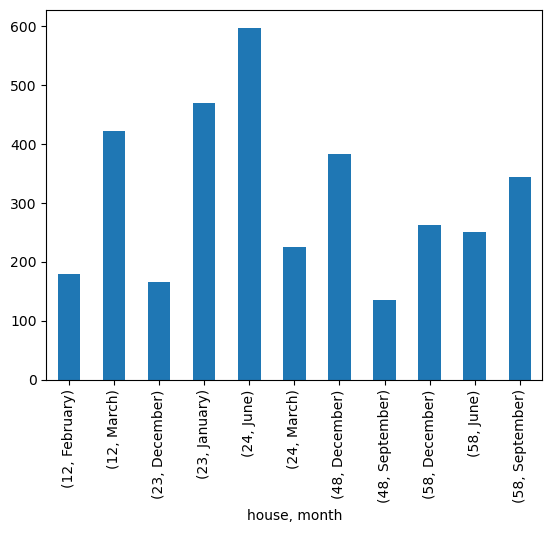

In [17]:
df_grouped['general_price'].plot(kind='bar', xlabel = ('house, month'))

In [18]:
#task4
months = df_merged['month_name'].unique()

In [19]:
def paid_sum(month):
    df_new = df_merged.groupby(['month_name', 'house_num']).sum()
    df_new = df_new.loc[month, ['payment_for_cold', 'payment_for_hot']]
    display(df_new)
    df_new.plot(kind = 'bar', xlabel=f'month: {month}')

In [20]:
widgets.interact(paid_sum, month=months)

interactive(children=(Dropdown(description='month', options=('January', 'December', 'September', 'June', 'Marc…

<function __main__.paid_sum(month)>